# Backpropagation Neural Network 
## Backpropagation Neural Network  with one hidden layer is used to recognize a handwritten digits. 
## Algorithm does not use any library and has been written from scratch. You can try improve a score (which is 0.97571 for presented parameters) by plaing with number of hidden layers and regularization paramiter lambda.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from math import exp, log10
sns.set()
# Scipy Optimization Algorithm is used to find the optimal parameters
import scipy.optimize as opt
#Sklearn OneHot Encoder to Encode categorical integer features
from sklearn.preprocessing import OneHotEncoder
#Sklearn train_test_split to split a set on train and test 
from sklearn.model_selection import train_test_split

In [5]:
#Load the training  and test datasets
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.shape, test.shape

((42000, 785), (28000, 784))

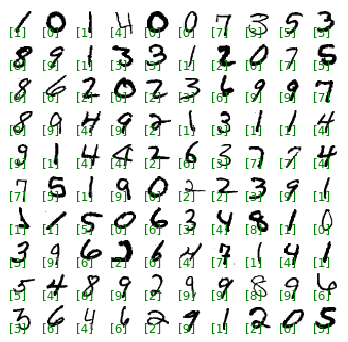

In [6]:
# Construct the X any Y matrix arrays for train and test sets
trainX = np.array(train.iloc[:,1:])
trainY = np.array(train.iloc[:,0]).reshape(-1,1)

# Plot some digits from training example
c = np.array([e.tolist() for e in trainX]).reshape(-1,28,28)   # create 3D arrray with digits (42000, 28, 28)
fig, axes = plt.subplots(10, 10, figsize=(6, 6),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(c[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(trainY[i]),
    transform=ax.transAxes, color='green')

In [ ]:
sns.countplot(train.iloc[:,0])

In [45]:
#Normalization 
#trainX = trainX.astype(np.float)
trainX = trainX/255
trainX = trainX.astype('float32')
trainX=np.column_stack((np.ones(len(trainX)),trainX))


testX = np.array(test)
#Normalization
testX = testX/255
testX = testX.astype('float32')
testX=np.column_stack((np.ones(len(testX)),testX))

trainX.shape, trainY.shape, testX.shape

In [32]:
# Split the data on the training and test set

#I dont use it in Kaggle but it is usefull to find the best model parameter. Some courses recommend to split data
# into three parts, the Test_set should be used to set a model parameters and validation_set to predict a score.

#xn_train, xn_test, yn_train, yn_test = train_test_split(trainX, trainY, test_size=0.3, random_state=40)
#xn_train.shape, xn_test.shape, yn_train.shape, yn_test.shape

In [33]:
#Encode the Y matrix
enc = OneHotEncoder(sparse=False) 
Y_enc=enc.fit_transform(trainY)
Y_enc.shape

In [34]:
def sigmoid(x):
    g = 1/(1+np.exp(-x))
    return g

In [35]:
#Funtion for Forward propagation
def forward_prop(x, t1, t2):
    t1=t1.T
    t2=t2.T
    a1 = x #42000 X 785
    z2 = np.matmul(a1,t1)
    a2 = sigmoid(z2)
    a2 = np.column_stack((np.ones(len(a2)),a2)) #42000 X 46
    z3 = np.matmul(a2,t2)
    a3 = sigmoid(z3)
    return z2, a2, z3, a3

In [37]:
#This range of values ensures that the parameters are kept small and makes the learning more efficient.
input_size=784
hidden_size=700
num_labels=10
lamb = 0

# epsilon_init consider the input and hidden sizes
epsilon_init = round((6/(input_size + hidden_size))**0.5,2)

param = (np.random.rand((input_size+1)*hidden_size + (hidden_size+1)*num_labels) - 0.5)*epsilon_init/0.5

# check the code for initial values outside of Backpropagation Function
t1 = param[:(input_size+1)*hidden_size].reshape(hidden_size,input_size+1)
t2 = param[(input_size+1)*hidden_size:].reshape(num_labels,hidden_size+1)
print ('t1 shape', t1.shape,'t1 min =', t1.min(),'t1 max =', t1.max())
print ('t2 shape', t2.shape, 't2 min =', t2.min(),'t2 max =', t2.max())

In [38]:
#Cost function
def J(param, x, y, input_size, hidden_size, num_labels, lamb):
    m = len(y)
    t1 = param[:(input_size+1)*hidden_size].reshape(hidden_size,input_size+1)
    t2 = param[(input_size+1)*hidden_size:].reshape(num_labels,hidden_size+1)
    z2, a2, z3, a3 = forward_prop(x, t1, t2)
    c = (np.multiply(-y,np.log(a3)) - np.multiply((1-y),np.log(1-a3)))
    c = c.sum()/m
    
    # Regularization part    //np.sum(np.square(theta1[:,1:])  //np.power(theta2,2)[:,1:].sum()
    reg = (np.sum(np.square(t1[:,1:])) + np.power(t2,2)[:,1:].sum())*lamb/(2*m)
    J = c+reg
    return J

In [39]:
cost = J(param, trainX, Y_enc, input_size, hidden_size, num_labels, lamb)
print('The Cost of the function is',cost)

In [40]:
# sigm=True  mean that the argument (x) is simoid funciton already
def sigm_grad(x, sigm=True):
    if sigm is False:
        x=sigmoid(x)
    sg = x*(1-x)
    return sg

#Check the function
sigm_grad(0, sigm=False)

In [41]:
def backprop(param, x, y, input_size, hidden_size, num_labels, lamb):
    m = len(y)

    '''
    #Cost part same as J
    t1 = param[:(input_size+1)*hidden_size].reshape(hidden_size,input_size+1)
    t2 = param[(input_size+1)*hidden_size:].reshape(num_labels,hidden_size+1)
    z2, a2, z3, a3 = forward_prop(x, t1, t2)
    c = (np.multiply(-y,np.log(a3)) - np.multiply((1-y),np.log(1-a3)))
    c = c.sum()/m
    # Cost Regularization
    reg = (np.power(theta1,2)[:,1:].sum() + np.power(theta2,2)[:,1:].sum())*lamb/(2*m)
    
    J = c + reg
    '''

    # Gradient part
    t1 = param[:(input_size+1)*hidden_size].reshape(hidden_size,input_size+1)
    t2 = param[(input_size+1)*hidden_size:].reshape(num_labels,hidden_size+1)
    
    z2, a2, z3, a3 = forward_prop(x, t1, t2)  #a2 42000 X 46
    
    d3 = a3 - y  # 42000 x 10
    d2 = np.matmul(d3,t2) #42000 X 26
    d2 = np.multiply(d2,sigm_grad(a2, sigm=True))  #42000 X 46
    
    D1 = np.matmul(d2[:,1:].T,x)/m  # 45 X 785    Skip the first column in d2 since Theta1 doesnt change bias parameter
    D2 = np.matmul(d3.T,a2)/m  # 10 X 46
    
    #Gradient Regularization, first bias column with (1) is not regularized
    D1[:,1:] = D1[:,1:] + (t1[:,1:] * lamb) / m   # 45 X 784
    D2[:,1:] = D2[:,1:] + (t2[:,1:] * lamb) / m   # 10 X 45
    
    grad = np.concatenate((np.ravel(D1), np.ravel(D2)))
    
    return grad
#If Cost part is active: return J, grad

In [42]:
backprop(param, trainX, Y_enc, input_size, hidden_size, num_labels, lamb)

In [46]:
# jac=True and fun=backprop if backprop  function return J, grad
# I use inly 50 iterations here as an example. The result mentioned in the very beginning was obteined with 250 iterations
fmin = opt.minimize(fun=J,  x0=param, args=(trainX, Y_enc, input_size, hidden_size, num_labels, lamb),  
                method='TNC', jac=backprop, options={'maxiter': 50})

In [47]:
fmin.x.shape

In [48]:
def accuracy(theta,X, Y):
    m=len(Y)
    theta1 = theta[:(input_size+1)*hidden_size].reshape(hidden_size,input_size+1)
    theta2 = theta[(input_size+1)*hidden_size:].reshape(num_labels,hidden_size+1)
    z2, a2, z3, a3 = forward_prop(X, theta1, theta2)
    y_pred = np.array(np.argmax(a3, axis=1)) 
    accur = np.array([1 for (a,b) in zip(y_pred,Y) if a==b ]).sum()/m
    return accur, y_pred

In [49]:
accur, y_pred = accuracy(fmin.x,trainX, trainY)
print ('Accuracy of the algorithm is ', accur)

In [59]:
def predict(theta,X):
    theta1 = theta[:(input_size+1)*hidden_size].reshape(hidden_size,input_size+1)
    theta2 = theta[(input_size+1)*hidden_size:].reshape(num_labels,hidden_size+1)
    z2, a2, z3, a3 = forward_prop(X, theta1, theta2)
    y_pred = np.array(np.argmax(a3, axis=1)) 
    return y_pred
prediction = predict(fmin.x,testX)

In [61]:
# Submit the result. And again this is a result with 50 iterrations as an example, use 250 to get a published score!
submission_df = {"ImageId": np.linspace(1,len(prediction),len(prediction)).astype(int),
                 "Label": prediction}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_2(NN).csv",index=False)